In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import sklearn
import scipy
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('quikr_car.csv')

In [3]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [4]:
df.shape

(892, 6)

In [5]:
df.size

5352

In [6]:
df.isna().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

<Axes: >

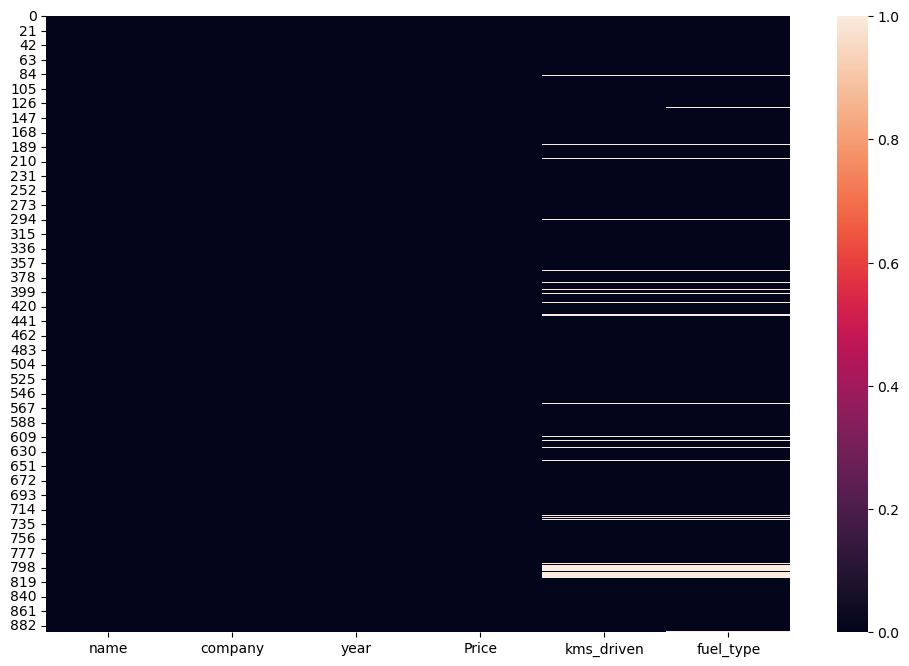

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

In [8]:
Missing_coulmn=[]
for i in df.columns:
    if df[i].isnull().sum() !=0:
        df[i].fillna(df[i].mode()[0],inplace=True)

In [9]:
df.isna().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

<Axes: >

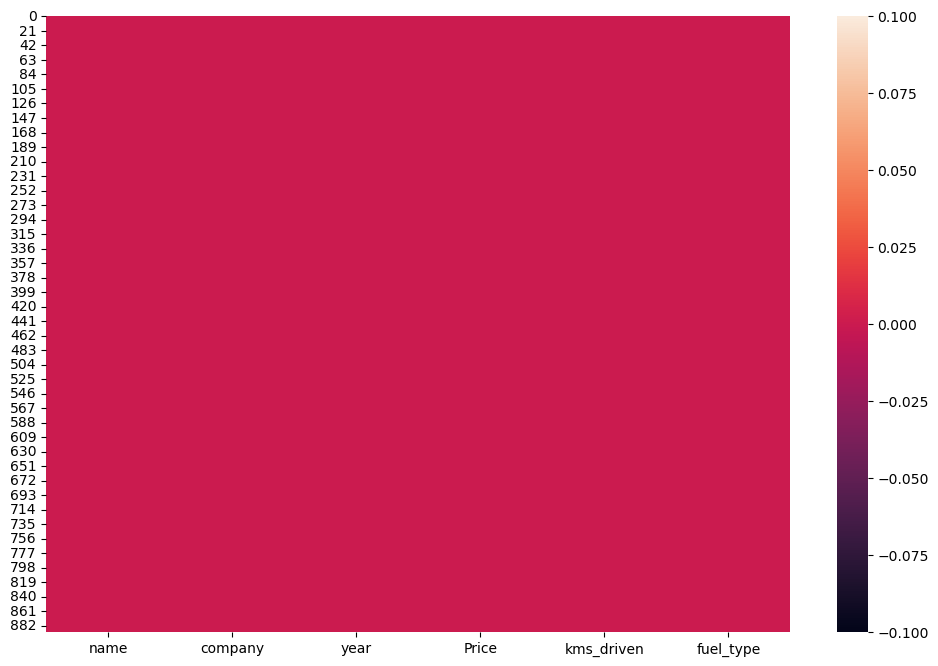

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

In [11]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000","35,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,Petrol


In [12]:
df.dtypes

name          object
company       object
year          object
Price         object
kms_driven    object
fuel_type     object
dtype: object

In [13]:
df.describe().T

,count,unique,top,freq
name,892,525,Honda City,13
company,892,48,Maruti,235
year,892,61,2015,117
Price,892,274,Ask For Price,35
kms_driven,892,258,"35,000 kms",82
fuel_type,892,3,Petrol,495


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  892 non-null    object
 5   fuel_type   892 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [15]:
catg_feature = [col for col in df.columns if df[col].dtypes=='object']

In [16]:
catg_feature

['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type']

In [17]:
df['company'].value_counts()

company
Maruti        235
Hyundai       145
Mahindra      100
Tata           74
Honda          61
Toyota         39
Chevrolet      35
Renault        34
Ford           31
Volkswagen     20
Skoda          13
Audi           11
Datsun          8
Mini            8
BMW             8
Nissan          6
Commercial      6
Mercedes        6
Mitsubishi      6
Force           4
Fiat            4
tata            3
Hindustan       3
I               3
MARUTI          2
urgent          2
Used            2
Jaguar          2
Sale            2
Well            1
Any             1
TATA            1
sell            1
scratch         1
9               1
7               1
all             1
Land            1
2012            1
i               1
Volvo           1
very            1
Jeep            1
Swift           1
URJENT          1
selling         1
Yamaha          1
Tara            1
Name: count, dtype: int64

In [18]:
backup = df.copy()

In [19]:
df = df[df['year'].str.isnumeric()]

In [20]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,Petrol


In [21]:
df['year']=df['year'].astype(int)

In [22]:
df=df[df['Price']!='Ask For Price']

In [23]:
df['Price']=df['Price'].str.replace(',','').astype(int)

In [24]:
df['kms_driven']=df['kms_driven'].str.split().str.get(0).str.replace(',','')

In [25]:
df=df[df['kms_driven'].str.isnumeric()]

In [26]:
df['kms_driven']=df['kms_driven'].astype(int)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   817 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [28]:
df=df[~df['fuel_type'].isna()]

In [29]:
df.shape

(817, 6)

In [30]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [31]:
df['name']=df['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [32]:
df=df.reset_index(drop=True)

In [33]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
812,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
813,Tata Indica V2,Tata,2009,110000,30000,Diesel
814,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
815,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [34]:
# convert to clean csv file 

df.to_csv('clean_car_data.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   817 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.9+ KB


In [36]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,817,254,Maruti Suzuki Swift,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company,817,25,Maruti,221,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,817.0,NaN,NaN,NaN,2012.440636,4.002354,1995.0,2010.0,2013.0,2015.0,2019.0
Price,817.0,NaN,NaN,NaN,411550.274174,474917.25348,30000.0,175000.0,299999.0,490000.0,8500003.0
kms_driven,817.0,NaN,NaN,NaN,46250.71481,34283.745254,0.0,27000.0,41000.0,56758.0,400000.0
fuel_type,817,3,Petrol,429,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df=df[df['Price']<6000000]

In [38]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

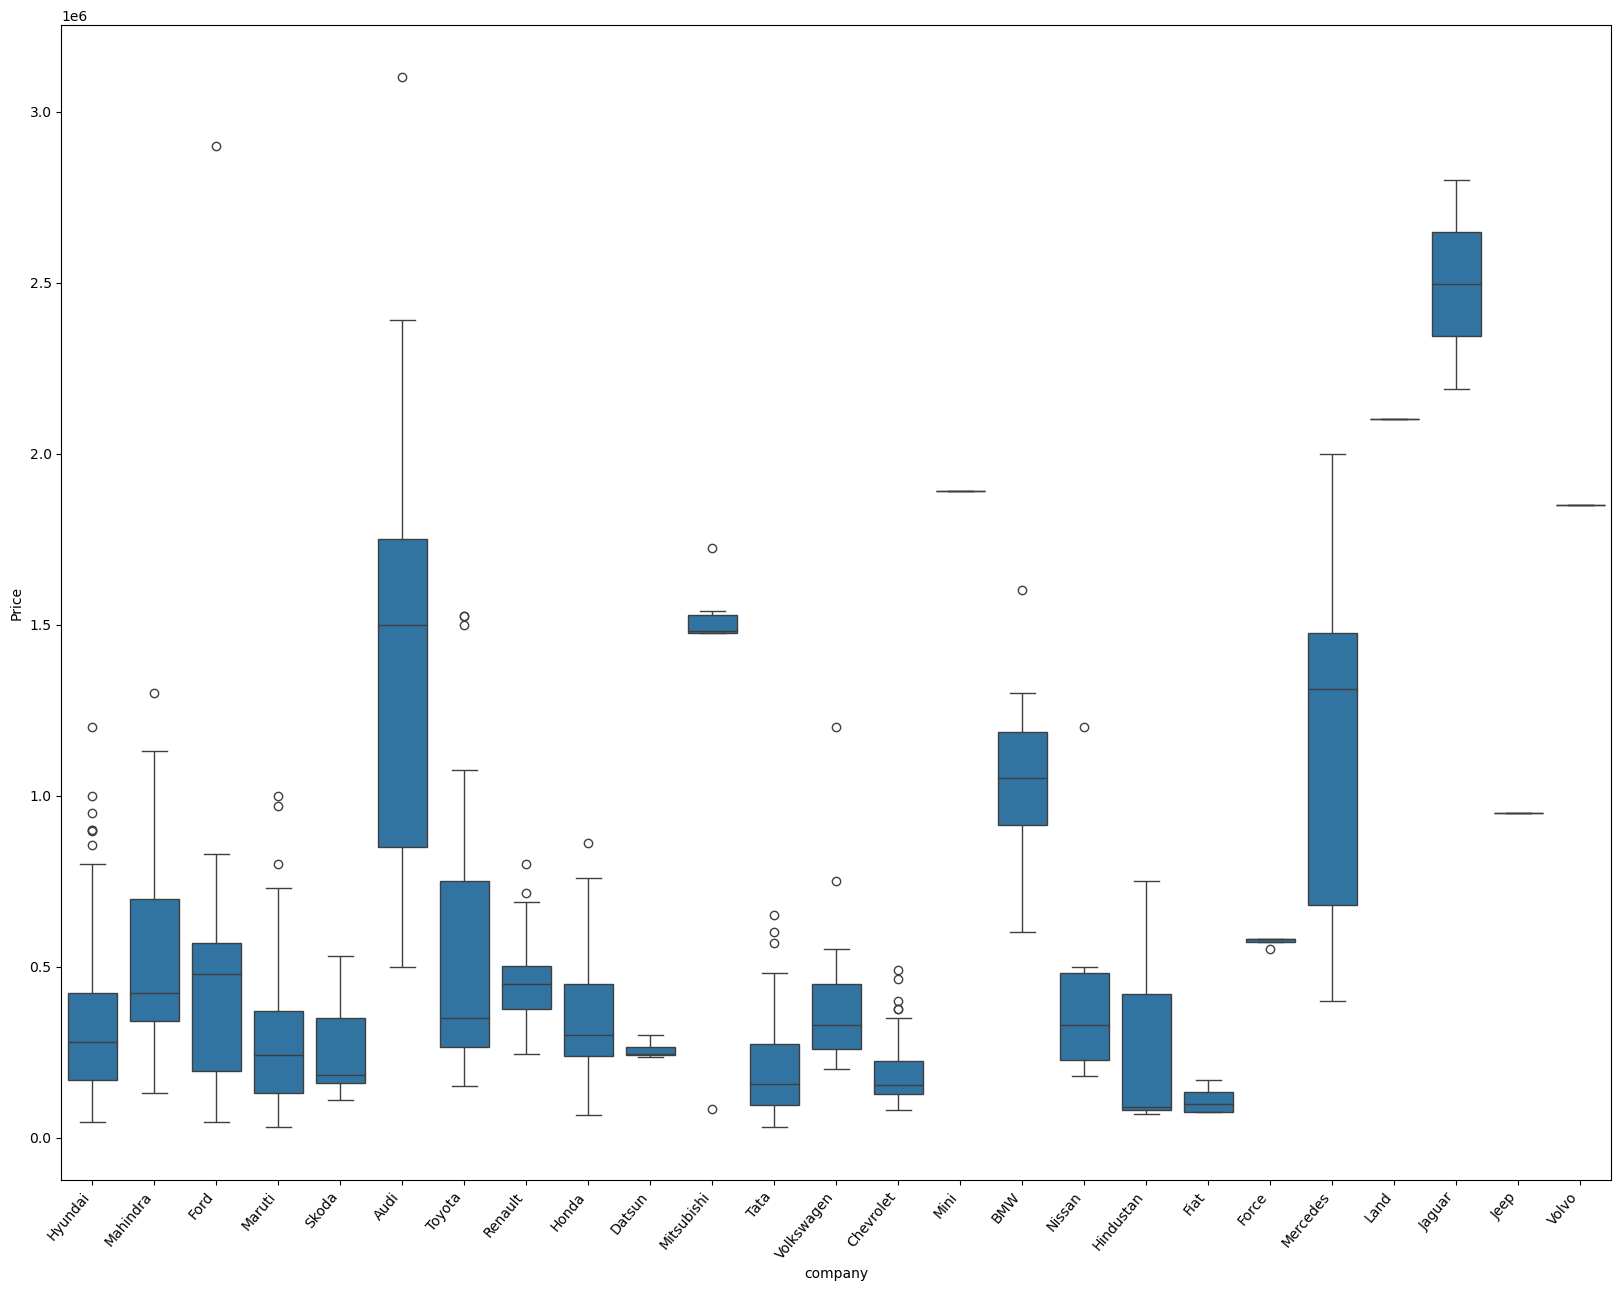

In [39]:
plt.subplots(figsize=(20,15))
ax = sns.boxplot(data=df,x='company',y='Price')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 50,ha='right')
plt.show()

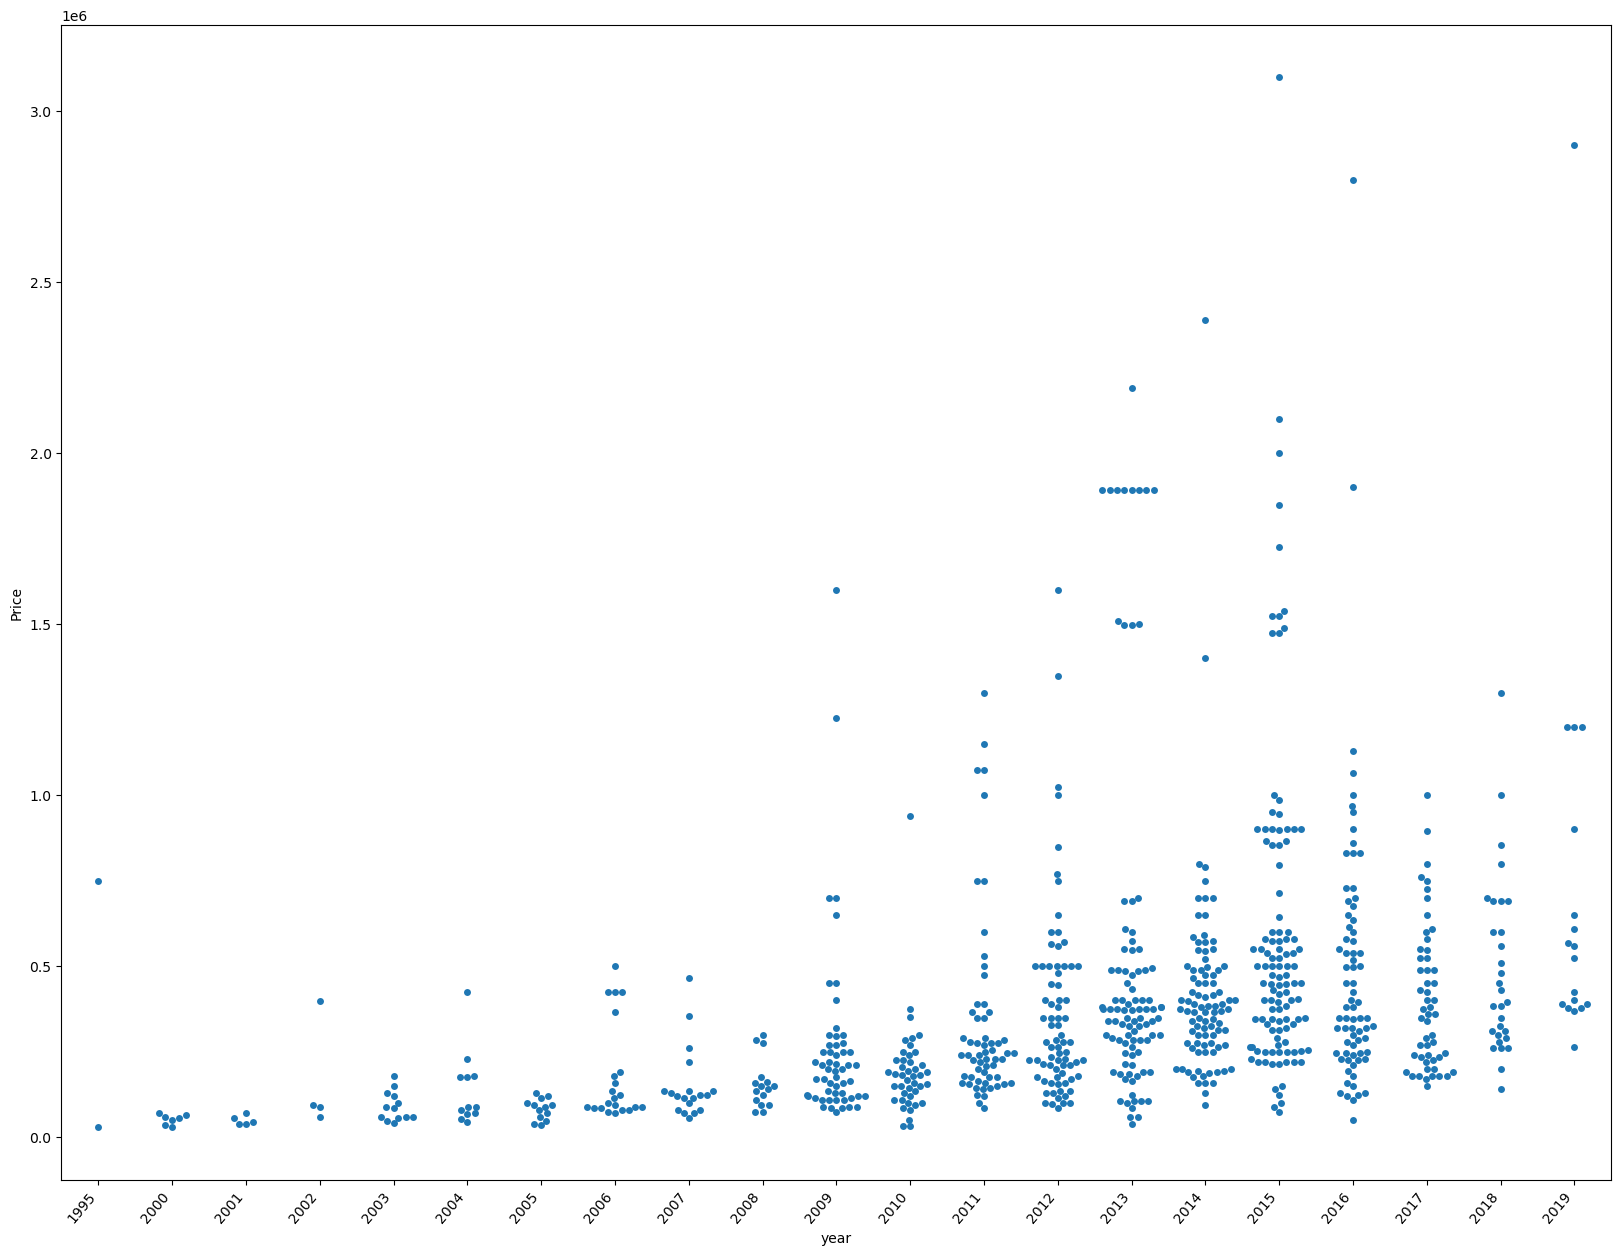

In [40]:
plt.subplots(figsize=(20,15))
ax = sns.swarmplot(data=df,x='year',y='Price')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 50,ha='right')
plt.show()

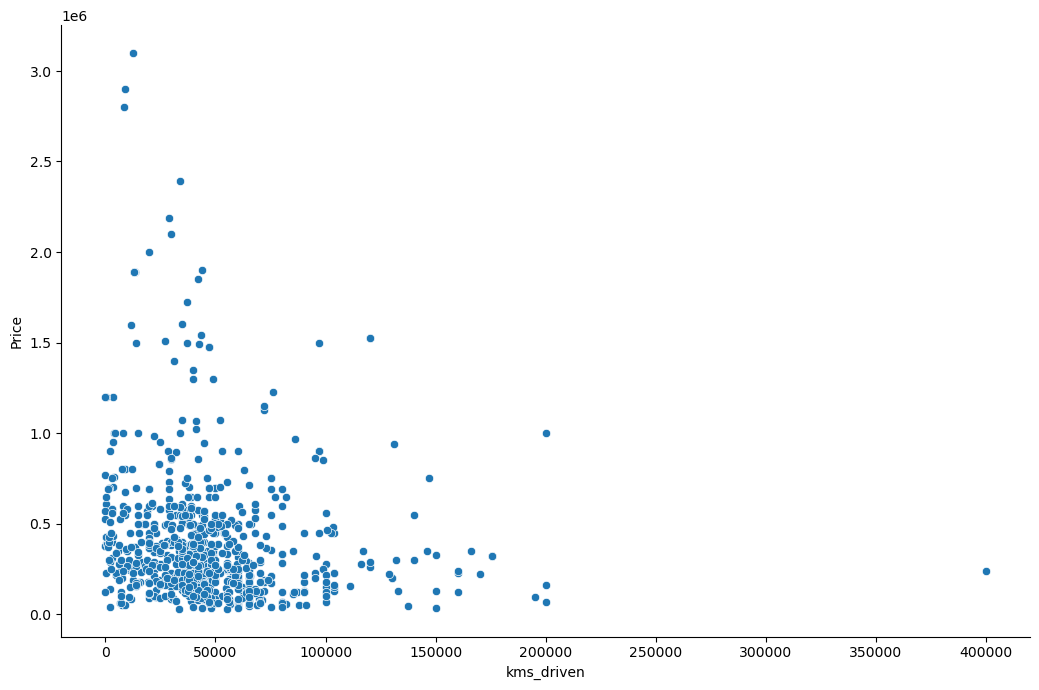

In [41]:
sns.relplot(df,x='kms_driven',y='Price',height=7,aspect=1.5)
plt.show()

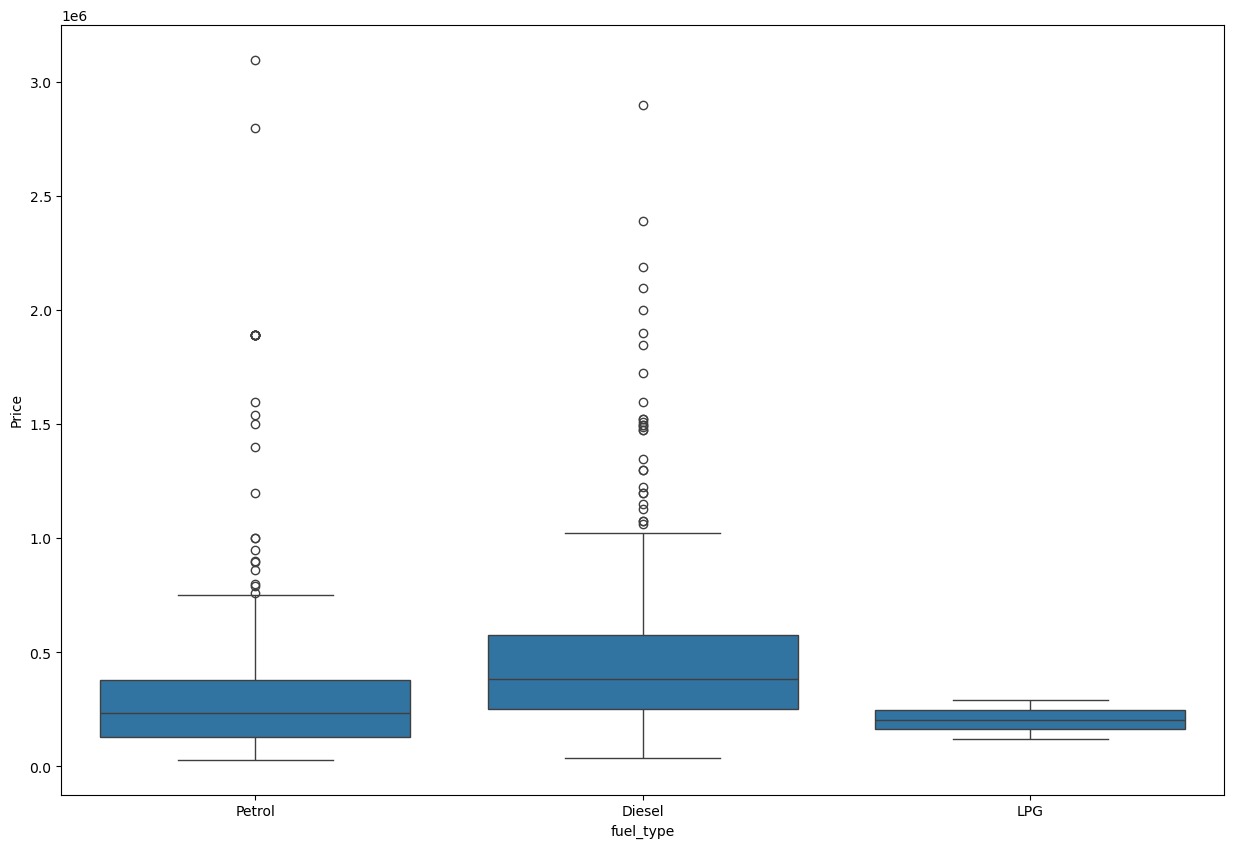

In [42]:
plt.subplots(figsize=(15,10))
sns.boxplot(df,x='fuel_type',y='Price')
plt.show()

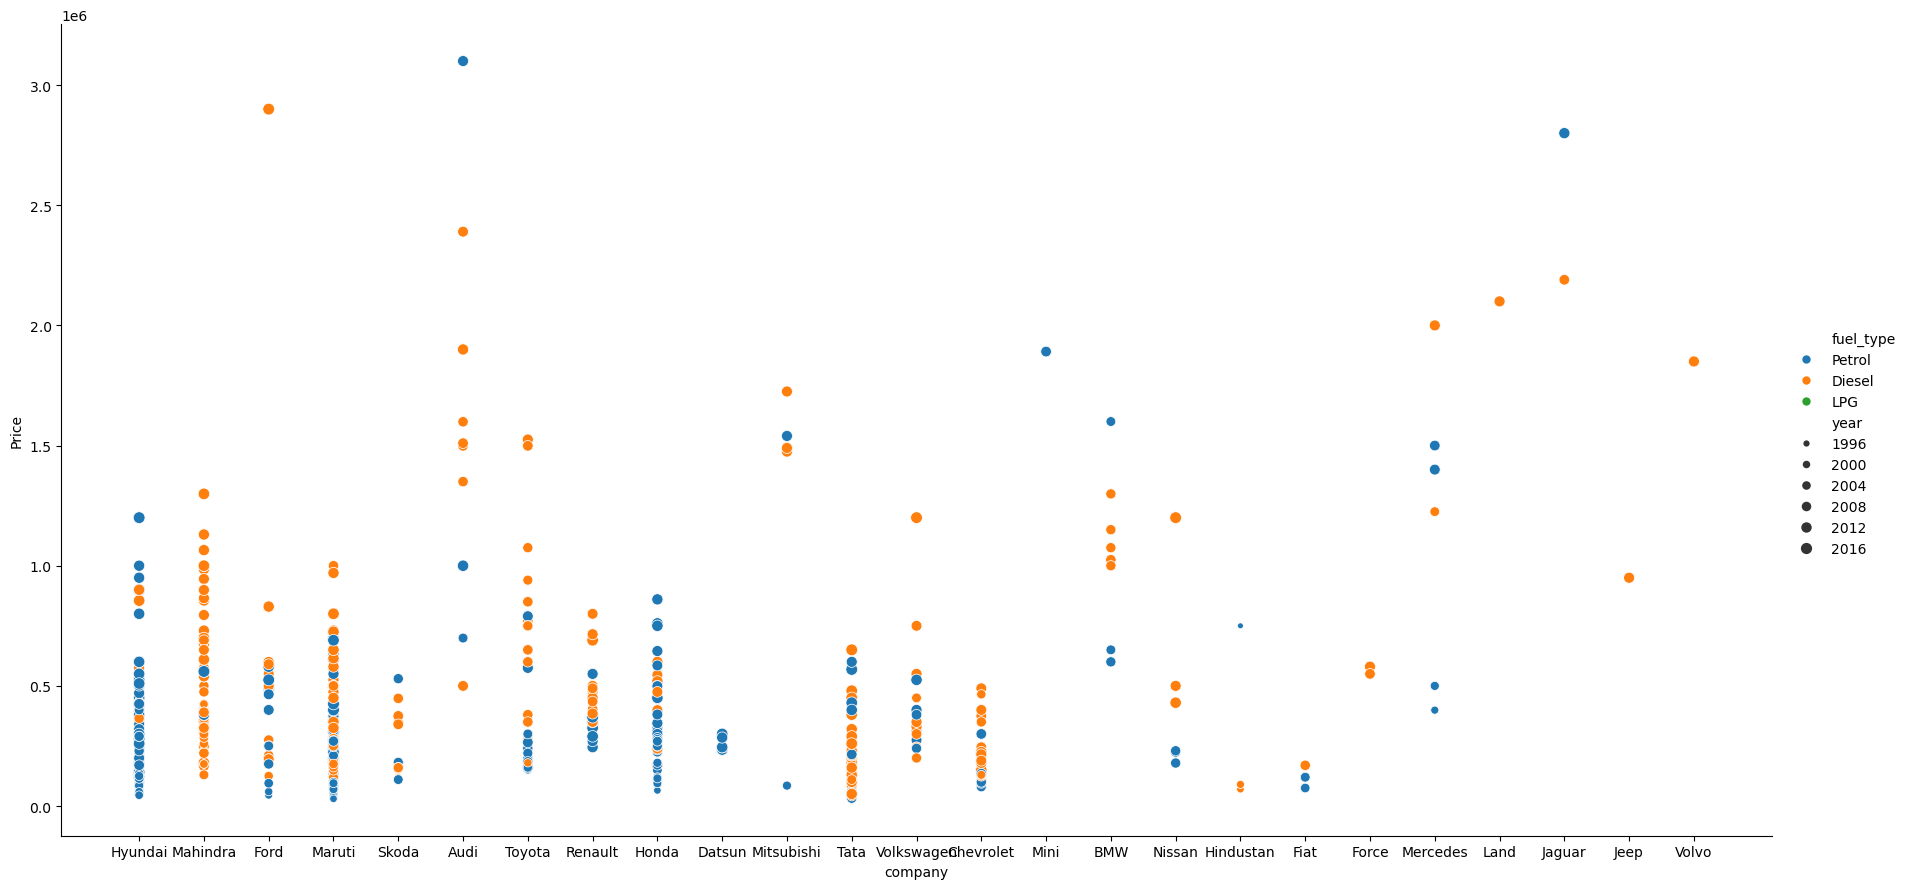

In [43]:
ax = sns.relplot(df,x='company',y='Price',hue='fuel_type',size='year',height=9,aspect=2)
plt.show()

In [44]:
# feature selection
X = df.drop(['Price'],axis=1)
y= df.Price

In [45]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
812,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
813,Tata Indica V2,Tata,2009,30000,Diesel
814,Toyota Corolla Altis,Toyota,2009,132000,Petrol
815,Tata Zest XM,Tata,2018,27000,Diesel


In [46]:
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
812    270000
813    110000
814    300000
815    260000
816    390000
Name: Price, Length: 816, dtype: int32

In [47]:
y.shape

(816,)

#

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=100)

In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression 


In [50]:
encode = OneHotEncoder()

In [51]:
encode.fit_transform(X[['name','company','fuel_type']])

<816x282 sparse matrix of type '<class 'numpy.float64'>'
	with 2448 stored elements in Compressed Sparse Row format>

#

In [52]:
col_transform = make_column_transformer((OneHotEncoder(categories=encode.categories_),['name','company','fuel_type']),remainder='passthrough')

In [53]:
lr = LinearRegression()

In [54]:
pipe = make_pipeline(col_transform,lr)

In [55]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [56]:
y_pred = pipe.predict(X_test)

In [57]:
print(r2_score(y_test,y_pred)*100)

66.78551942500506


#

In [58]:
score =[]

for i in range(1000):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=i)
    lr= LinearRegression()
    pipe = make_pipeline(col_transform,lr)
    pipe.fit(X_train,y_train)
    y_pred= pipe.predict(X_test)
    score.append(r2_score(y_test,y_pred))

In [59]:
# maximum R2 score
np.argmax(score)

412

In [60]:
score[np.argmax(score)]

0.803766344212665

In [61]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([422657.6409026])

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(score))
lr=LinearRegression()
pipe=make_pipeline(col_transform,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.7057539583105203

#

#

In [63]:
pickle.dump(pipe,open('LinearRegressionmodel.pkl','wb'))

In [64]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([446912.35307593])

In [65]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese